In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
a = [('cache-misses', 'major-faults'), ('emc_freq', 'L1-dcache-load-misses'), ('context-switches', 'raw_syscalls_sys_enter'), ('branch-loads', 'sched_sched_overutilized'), ('branch-load-misses', 'raw_syscalls_sys_exit'), ('cache-misses', 'total_energy_consumption'), ('sched_sched_switch', 'minor-faults'), ('sched_sched_stat_runtime', 'instructions'), ('cycles', 'raw_syscalls_sys_enter'), ('branch-loads', 'sched_sched_switch'), ('kernel.sched_latency_ns', 'L1-dcache-loads'), ('branch-misses', 'L1-dcache-loads'), ('instructions', 'branch-loads'), ('L1-dcache-stores', 'raw_syscalls_sys_exit'), ('cache-misses', 'total_energy_consumption'), ('emc_freq', 'total_energy_consumption'), ('context-switches', 'total_energy_consumption'), ('branch-loads', 'total_energy_consumption'), ('branch-load-misses', 'total_energy_consumption'), ('cache-misses', 'total_energy_consumption'), ('sched_sched_switch', 'total_energy_consumption')]

b = [
   ('total_energy_consumption', 'core_freq'), 
   ('total_energy_consumption', 'emc_freq'), 
   ('total_energy_consumption', 'core_freq'), 
   ('total_energy_consumption', 'emc_freq'), 
   ('total_energy_consumption', 'migrations'), 
   ('total_energy_consumption', 'logical_devices'), 
   ('total_energy_consumption', 'minor-faults'), 
   ('total_energy_consumption', 'vm.swappiness'), 
   ('total_energy_consumption', 'kernel.max_pids')
]

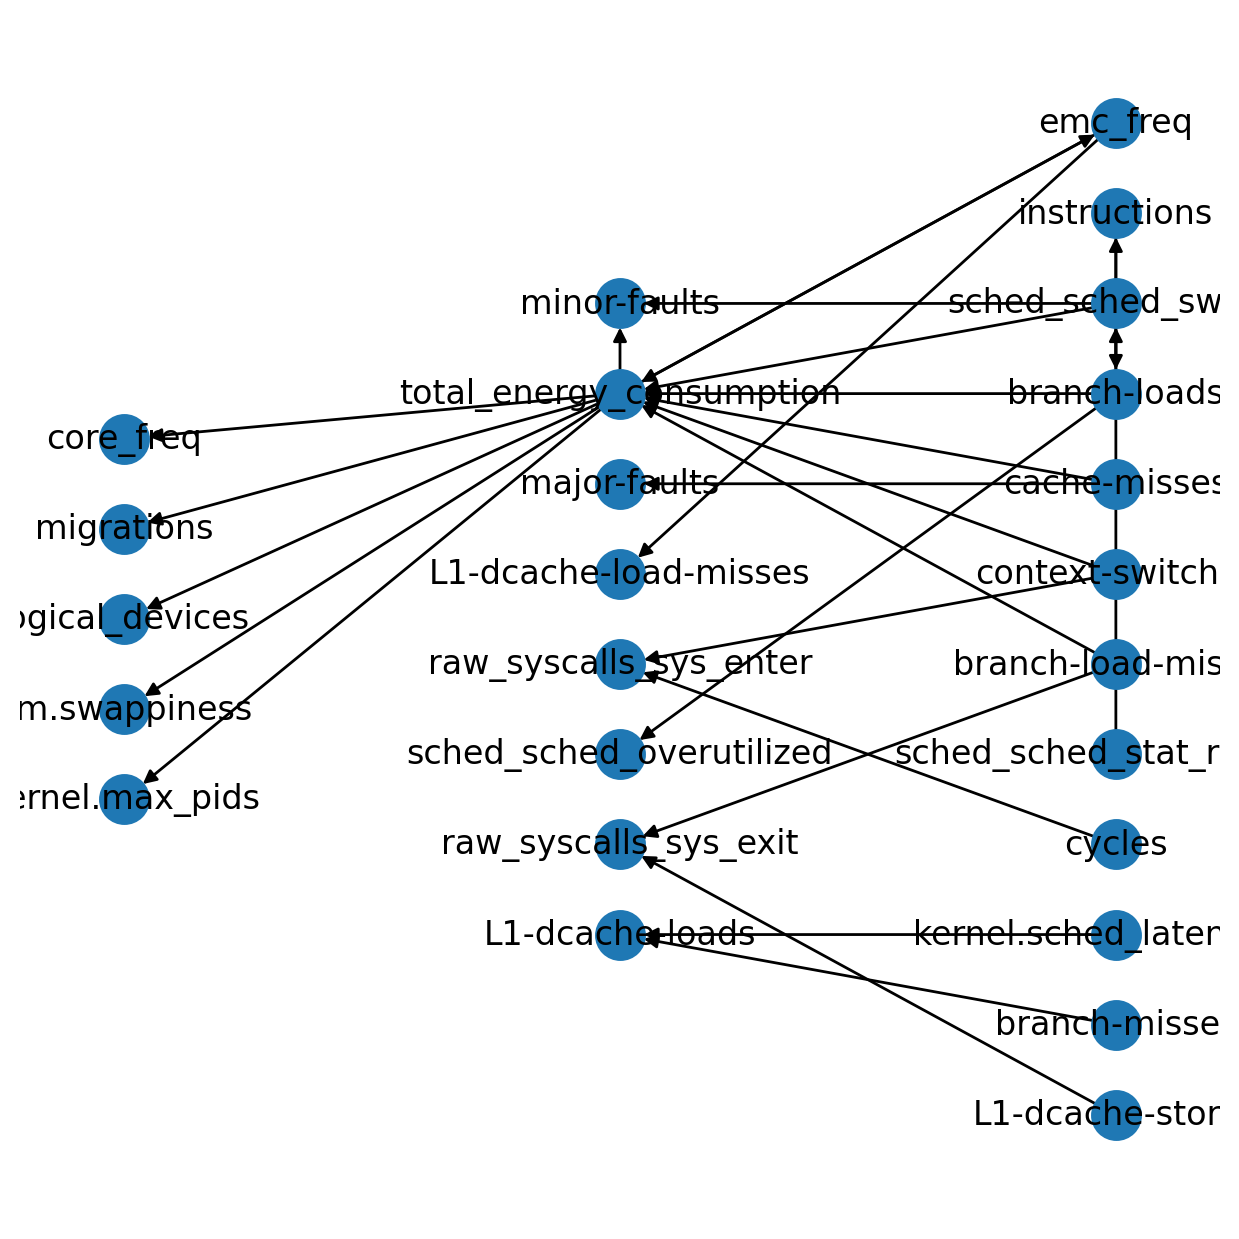

In [6]:
G = nx.DiGraph()

for tuple in b:
   G.add_node(tuple[1], subset=0)

for tuple in b:
   G.add_node(tuple[0], subset=1)

for tuple in a:
   G.add_node(tuple[1], subset=2)

for tuple in a:
   G.add_node(tuple[0], subset=3)

G.add_edges_from(a)
G.add_edges_from(b)

pos = nx.multipartite_layout(G)

fig = plt.figure(1, figsize=(6, 6), dpi=200)

nx.draw(G,pos=pos, with_labels=True)

plt.show()

In [4]:
inference_time = [('emc_freq', 'sched_sched_wakeup_new'), ('memory_growth', 'raw_syscalls_sys_enter'), ('migrations', 'L1-dcache-loads'), ('major-faults', 'sched_sched_load_avg_cpu'), ('instructions', 'branch-loads'), ('vm.dirty_ratio', 'inference_time'), ('instructions', 'sched_sched_wakeup'), ('sched_sched_switch', 'L1-dcache-loads'), ('branch-load-misses', 'sched_sched_switch'), ('minor-faults', 'L1-dcache-stores'), ('sched_sched_overutilized', 'raw_syscalls_sys_enter'), ('vm.nr_hugepages', 'L1-dcache-load-misses'), ('sched_sched_wakeup_new', 'instructions'), ('minor-faults', 'raw_syscalls_sys_exit'), ('migrations', 'cycles'), ('context-switches', 'major-faults'), ('cycles', 'L1-dcache-stores'), ('sched_sched_switch', 'sched_sched_stat_runtime'), ('cycles', 'raw_syscalls_sys_enter'), ('cache-misses', 'raw_syscalls_sys_exit'), ('vm.overcommit_hugepages', 'migrations'), ('kernel.sched_latency_ns', 'context-switches'), ('sched_sched_wakeup_new', 'minor-faults'), ('L1-dcache-loads', 'sched_sched_wakeup'), ('context-switches', 'sched_sched_overutilized'), ('emc_freq', 'inference_time'), ('L1-dcache-stores', 'branch-loads'), ('cycles', 'cache-misses'), ('major-faults', 'branch-misses'), ('kernel.sched_time_avg_ms', 'branch-load-misses'), ('vm.drop_caches', 'inference_time'), ('branch-load-misses', 'major-faults'), ('L1-dcache-load-misses', 'branch-misses'), ('emc_freq', 'inference_time'), ('memory_growth', 'inference_time'), ('migrations', 'inference_time'), ('major-faults', 'inference_time'), ('instructions', 'inference_time'), ('vm.dirty_ratio', 'inference_time'), ('instructions', 'inference_time'), ('sched_sched_switch', 'inference_time'), ('branch-load-misses', 'inference_time'), ('minor-faults', 'inference_time'), ('sched_sched_overutilized', 'inference_time'), ('vm.nr_hugepages', 'inference_time'), ('sched_sched_wakeup_new', 'inference_time'), ('minor-faults', 'inference_time'), ('migrations', 'inference_time'), ('context-switches', 'inference_time')]

In [83]:
G = nx.DiGraph()

options = set()

layer1 = []
layer2 = []
layer3 = []

for node in inference_time:
   for item in node:
      options.add(item)

for item in options:
   first = False
   second = False

   for node in inference_time:
      if node[0] == item:
         first = True
      if node[1] == item:
         second = True

   if first and not second:
      layer1.append(item)
      continue

   if first and second:
      layer2.append(item)
      continue

   if not first and second:
      layer3.append(item)
      continue



G.add_nodes_from(layer1, subset=0)
G.add_nodes_from(layer2, subset=1)
G.add_nodes_from(layer3, subset=2)

G.add_edges_from(inference_time)

fig = plt.figure(1, figsize=(16, 9), dpi=600)

pos = nx.drawing.layout.multipartite_layout(G)

nx.draw(G, pos=pos, with_labels=True, font_size=12)

plt.show()